для начала импотритуем необходимы дидлиотеки и функции из урока

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [3]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [4]:
### Шаг 3. Обученние нейронной сети
# напишем функцию которая будет принимать количество нейронов и эпох и
#строить 2 слойную нейронную сеть
def neuron_linc_2(neuron_numb, epohs):
    
    # определим число нейронов скрытого слоя
    neuron_numb = neuron_numb


    # присваевание случайных весов



    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # скорость обучения (learning rate)
    n = 0.05

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(epohs):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
        # коррекция
        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
        # метрика модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
        
    return errors

In [5]:
#функция для 3 слойной нейронной сети
def neuron_linc_3(neuron_numb, epohs):
    
    # определим число нейронов скрытого слоя
    neuron_numb = neuron_numb


    # присваевание случайных весов

    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((neuron_numb, neuron_numb)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
    w2 = 2*np.random.random((neuron_numb, 3)) - 1
    # скорость обучения (learning rate)
    n = 0.05

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(epohs):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))
        layer3 = sigmoid(np.dot(layer2, w2))
        # обратное распространение(back propagation) с использованием градиентного спуска
        layer3_error = y_train - layer3
        layer3_delta = layer3_error * sigmoid_deriv(layer3)
        
        layer2_error = layer3_delta.dot(w2.T) # производная функции потерь = производная квадратичных потерь 
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
        # коррекция
        w2 += layer2.T.dot(layer3_delta) * n
        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
        # метрика модели
        error = np.mean(np.abs(layer3_error))
        errors.append(error)
        accuracy = (1 - error) * 100
        
    return errors

In [19]:
#функция для 4 слойной нейронной сети
def neuron_linc_4(neuron_numb, epohs):
    
    # определим число нейронов скрытого слоя
    neuron_numb = neuron_numb


    # присваевание случайных весов

    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((neuron_numb, neuron_numb)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
    w2 = 2*np.random.random((neuron_numb, neuron_numb))
    w3 = 2*np.random.random((neuron_numb, 3)) - 1
    # скорость обучения (learning rate)
    n = 0.05

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(epohs):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))
        layer3 = sigmoid(np.dot(layer2, w2))
        layer4 = sigmoid(np.dot(layer3, w3))
        # обратное распространение(back propagation) с использованием градиентного спуска
        layer4_error = y_train - layer4
        layer4_delta = layer4_error * sigmoid_deriv(layer4)
         
        layer3_error = layer4_delta.dot(w3.T)
        layer3_delta = layer3_error * sigmoid_deriv(layer3)
        
        layer2_error = layer3_delta.dot(w2.T) # производная функции потерь = производная квадратичных потерь 
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
        # коррекция
        w3 += layer3.T.dot(layer4_delta) * n
        w2 += layer2.T.dot(layer3_delta) * n
        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
        # метрика модели
        error = np.mean(np.abs(layer4_error))
        errors.append(error)
        accuracy = (1 - error) * 100
        
    return errors

Построим 2 слоиную нейронную сеть с разным количеством нейронов

In [6]:
neurons = [1,2,3,4,5,10]
res = []
for el in neurons:
    res.append(neuron_linc_2(el,1000))

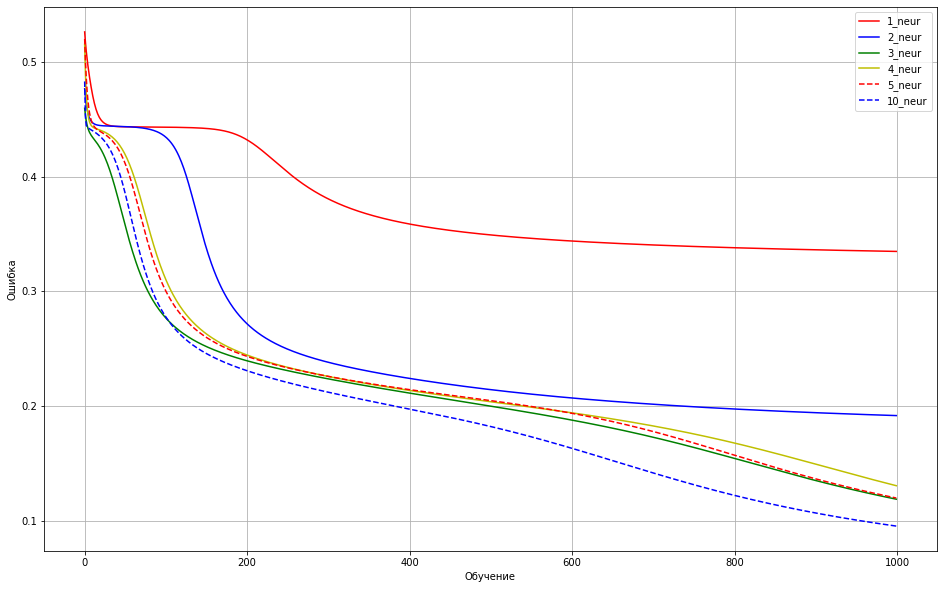

In [12]:
plt.figure(figsize = (16,10))
plt.plot(res[0], 'r', label = '1_neur')
plt.plot(res[1], 'b', label = '2_neur')
plt.plot(res[2], 'g', label = '3_neur')
plt.plot(res[3], 'y', label = '4_neur')
plt.plot(res[4], 'r', linestyle = '--', label = '5_neur')
plt.plot(res[5], 'b', linestyle = '--', label = '10_neur')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.legend()
plt.grid()
plt.show()

построим 3 слойную нейронную сеть

In [15]:
neurons = [1,2,3,4,5,10]
res = []
for el in neurons:
    res.append(neuron_linc_3(el,600))

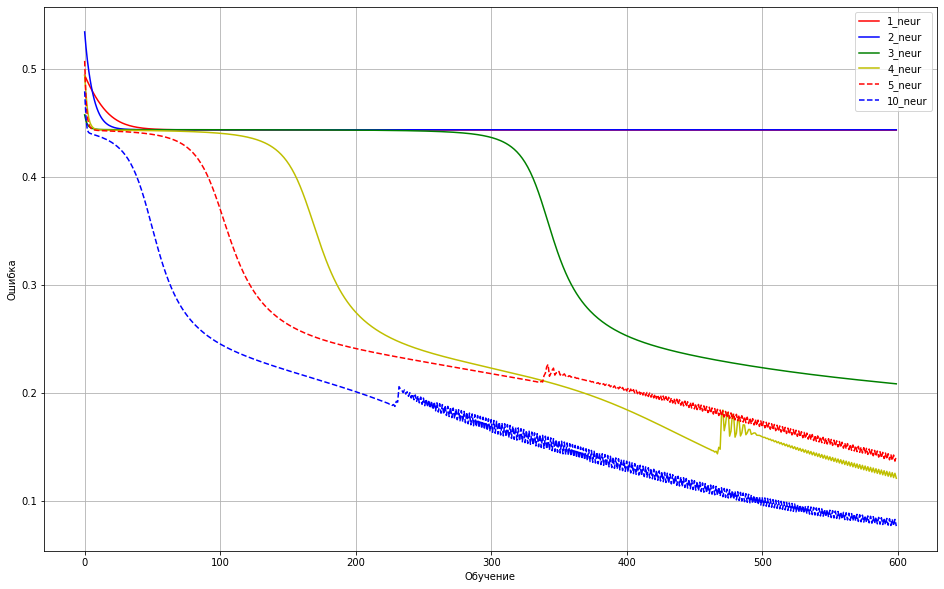

In [16]:
plt.figure(figsize = (16,10))
plt.plot(res[0], 'r', label = '1_neur')
plt.plot(res[1], 'b', label = '2_neur')
plt.plot(res[2], 'g', label = '3_neur')
plt.plot(res[3], 'y', label = '4_neur')
plt.plot(res[4], 'r', linestyle = '--', label = '5_neur')
plt.plot(res[5], 'b', linestyle = '--', label = '10_neur')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.legend()
plt.grid()
plt.show()

In [22]:
neurons = [1,2,3,4,5,10]
res = []
for el in neurons:
    res.append(neuron_linc_4(el,10000))

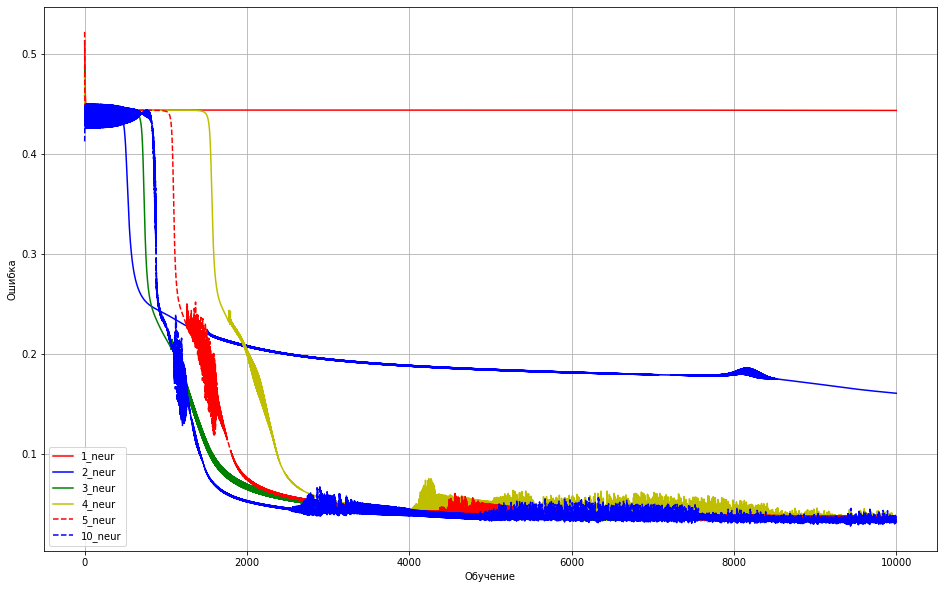

In [23]:
plt.figure(figsize = (16,10))
plt.plot(res[0], 'r', label = '1_neur')
plt.plot(res[1], 'b', label = '2_neur')
plt.plot(res[2], 'g', label = '3_neur')
plt.plot(res[3], 'y', label = '4_neur')
plt.plot(res[4], 'r', linestyle = '--', label = '5_neur')
plt.plot(res[5], 'b', linestyle = '--', label = '10_neur')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.legend()
plt.grid()
plt.show()

Выводы:в данной работе я построил 3 вида нейронной сети с разным количеством нейронов(1слойная, 2слойная, 3слойная) модно сдетать выводы что с увеличением количества слоем и нейронов уменьшаеться количество эпох для обучения модели, но при добавлении 4 слоя образуються помехи и количество эпох для минимальной ошибки начинает возрастать